### Import Imp Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
from nlppreprocess import NLP

import math
import string
punct = string.punctuation
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy.lang.en.stop_words import STOP_WORDS

from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve, auc

In [2]:
train=pd.read_csv('train_K_Tweets.csv')
test=pd.read_csv('test_K_Tweets.csv')
dataset=pd.concat([train,test])
pd.set_option('display.max_colwidth', 100)

In [3]:
dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0


# 1. Data cleaning¶
## a). We will start with cleaning basic text noises such as URLS , Email IDS , punctautions etc.

In [4]:
def lowercase_text(text):
    return text.lower()

train.text=train.text.apply(lambda x: lowercase_text(x))
test.text=test.text.apply(lambda x: lowercase_text(x))

In [5]:
train.text.head(5)

0                                  our deeds are the reason of this #earthquake may allah forgive us all
1                                                                 forest fire near la ronge sask. canada
2    all residents asked to 'shelter in place' are being notified by officers. no other evacuation or...
3                                      13,000 people receive #wildfires evacuation orders in california 
4               just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school 
Name: text, dtype: object

In [6]:
def remove_noise(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    #text = re.sub('#', '', text)
    return text

In [7]:
train.text=train.text.apply(lambda x: remove_noise(x))
test.text=test.text.apply(lambda x: remove_noise(x))

In [8]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake may allah forgive us all,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are being notified by officers no other evacuation or sh...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in california,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as smoke from wildfires pours into a school,1


## b). Now we will use NLP preprocessing to process our data ! This actually gave me better results

In [9]:
nlp = NLP()

train['text'] = train['text'].apply(nlp.process)
test['text'] = test['text'].apply(nlp.process)

In [10]:
train.text.head()

0                                                   our deeds are reason earthquake may allah forgive us
1                                                                  forest fire near la ronge sask canada
2    residents asked shelter in place are being notified by officers no evacuation shelter in place o...
3                                               people receive wildfires evacuation orders in california
4                            just got sent photo from ruby alaska smoke from wildfires pours into school
Name: text, dtype: object

## c). Stemming
## Now we have to stem our text , will be using SnowballStemmer

In [11]:
stemmer = SnowballStemmer("english")

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)

train['text'] = train['text'].apply(stemming)
test['text'] = test['text'].apply(stemming)

In [12]:
train.text.head()

0                                               our deed are reason earthquak may allah forgiv us
1                                                            forest fire near la rong sask canada
2    resid ask shelter in place are be notifi by offic no evacu shelter in place order are expect
3                                                  peopl receiv wildfir evacu order in california
4                        just got sent photo from rubi alaska smoke from wildfir pour into school
Name: text, dtype: object

# Mask the dataset in a new dataframe called "q" 

In [13]:
q = train.loc[0:999]

## Preprocessing Using Spacy 

In [14]:
stopwords = list(STOP_WORDS)

## Final processing and load tokens in a column as a set of cleaned words

In [18]:
import spacy
nlp = spacy.load("en_core_web_sm")


l = []
k = []

for j in range(0,len(q.text)):
    x=q.text[j]
    doc =nlp(x)
    for token in doc:
        #l.append(token)
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
            #k.append(temp)
        else:
            temp = token.lower_
        k.append(temp)
        
        
        
        
    cleaned_tokens = []
    for token in k:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)
        
        #for i in range(0,len(l)):
            #if token != l[i]:
                #print(token)
                #l.append(token)
                #sentance_list.append(sent)
    

In [19]:
q.shape

(1000, 5)

In [20]:
len(cleaned_tokens)

7883

In [21]:
All_word_list_set=list(set(cleaned_tokens))

In [22]:
len(All_word_list_set)

3094

In [23]:
tweets_cleaned = pd.DataFrame(All_word_list_set)

In [24]:
tweets_cleaned.head()

,0
0,coaster
1,drunk
2,bob
3,cargo
4,annihil


# Clean words of +ve and -ve tweets

In [25]:
l = []
k = []

for j in range(0,len(q.text)):
    if q.target[j]==1:
        x=q.text[j]
        doc =nlp(x)
        for token in doc:
            #l.append(token)
            if token.lemma_ != "-PRON-":
                temp = token.lemma_.lower().strip()
                #k.append(temp)
            else:
                temp = token.lower_
            k.append(temp)




        positive_cleaned_tokens = []
        for token in k:
            if token not in stopwords and token not in punct:
                positive_cleaned_tokens.append(token)

            #for i in range(0,len(l)):
                #if token != l[i]:
                    #print(token)
                    #l.append(token)
                    #sentance_list.append(sent)


In [26]:
l = []
k = []

for j in range(0,len(q.text)):
    if q.target[j]==0:
        x=q.text[j]
        doc =nlp(x)
        for token in doc:
            #l.append(token)
            if token.lemma_ != "-PRON-":
                temp = token.lemma_.lower().strip()
                #k.append(temp)
            else:
                temp = token.lower_
            k.append(temp)




        negative_cleaned_tokens = []
        for token in k:
            if token not in stopwords and token not in punct:
                negative_cleaned_tokens.append(token)

            #for i in range(0,len(l)):
                #if token != l[i]:
                    #print(token)
                    #l.append(token)
                    #sentance_list.append(sent)


In [27]:
len(negative_cleaned_tokens)

5183

In [28]:
len(positive_cleaned_tokens)

2700

In [29]:
len(All_word_list_set)

3094

# Load all three cleaned list in a single dataframe

In [30]:
a = {'ALL WORDS': All_word_list_set,
     'POSITIVE SENTI WORDS': positive_cleaned_tokens,
    'NEGATIVE SENTI WORDS': negative_cleaned_tokens}
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()

In [31]:
df.head()

,ALL WORDS,POSITIVE SENTI WORDS,NEGATIVE SENTI WORDS
0,coaster,deed,man
1,drunk,reason,love
2,bob,earthquak,fruit
3,cargo,allah,summer
4,annihil,forgiv,love


# Because of their differ in row number None value are generated so replace them with zero

In [32]:
df = df.fillna("0")
#select all rows containing "foo"
df[df['NEGATIVE SENTI WORDS'].str.contains('danryckert', regex=False)]

,ALL WORDS,POSITIVE SENTI WORDS,NEGATIVE SENTI WORDS
3013,stir,0,danryckert


# Find the frequency of each word and load them in a dataframe

In [33]:
Posi_num = []
for j in range (0,len(All_word_list_set)):
    temp = df["ALL WORDS"][j]
    num = (df['POSITIVE SENTI WORDS'] == temp).sum()
    Posi_num.append(num)

In [34]:
Negative_num = []
for j in range (0,len(All_word_list_set)):
    temp = df["ALL WORDS"][j]
    num = (df['NEGATIVE SENTI WORDS'] == temp).sum()
    Negative_num.append(num)

In [35]:
a = {'ALL WORDS': All_word_list_set,
    # 'POSITIVE SENTI WORDS': positive_cleaned_tokens,
   # 'NEGATIVE SENTI WORDS': negative_cleaned_tokens,
    'POSTIVE_NUMBER':Posi_num,
    'NEGATIVE_NUMBER':Negative_num}
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()

In [36]:
df.head()

,ALL WORDS,POSTIVE_NUMBER,NEGATIVE_NUMBER
0,coaster,0,2
1,drunk,3,0
2,bob,0,4
3,cargo,1,0
4,annihil,19,37


In [37]:
type(df["POSTIVE_NUMBER"][0])

numpy.int64

# Total Number Nikalte hai yeha dono columns ke

In [38]:
sum_posi = 0
for j in range(0,(len(df.POSTIVE_NUMBER))):
    temp = df.POSTIVE_NUMBER[j]
    sum_posi = sum_posi + temp
    

In [39]:
sum_Negi = 0
for j in range(0,(len(df.NEGATIVE_NUMBER))):
    temp = df.NEGATIVE_NUMBER[j]
    sum_Negi = sum_Negi + temp

In [40]:
sum_Negi

5183

In [41]:
sum_posi

2700

In [42]:
len(All_word_list_set)

3094

# Now find the porobablity of positive tweets and negative tweets

 ## A). Probablity by Using Laplacian Smoothing 

#### +ve ke liye

In [43]:
#sum_posi = 0
Laplas_list_posi = []
for j in range(0,(len(df.POSTIVE_NUMBER))):
    temp = df.POSTIVE_NUMBER[j]
    #sum_posi = sum_posi + temp
    Laplas_divide_posi = (temp+1)/(2700+3094)
    Laplas_list_posi.append(Laplas_divide_posi)

In [44]:
b = {"Laplas_posi_data":Laplas_list_posi}
lipo = pd.DataFrame(b)

### -Ve ke liye

In [45]:
#sum_posi = 0
Laplas_list_negi = []
for j in range(0,(len(df.NEGATIVE_NUMBER))):
    temp = df.NEGATIVE_NUMBER[j]
    #sum_posi = sum_posi + temp
    divide_negi = temp/5183
    Laplas_list_negi.append(divide_negi)

In [46]:
lipo["Laplas_negi_data"] = Laplas_list_negi

### To check the sum of a probablity

In [47]:
# For +ve Probablity

Laplas_P_TOTAL_SUM = 0
for j in range(0,(len(lipo.Laplas_posi_data))):
    temp = lipo.Laplas_posi_data[j]
    Laplas_P_TOTAL_SUM = Laplas_P_TOTAL_SUM + temp

In [48]:
Laplas_P_TOTAL_SUM

1.0000000000000282

In [49]:
# For -ve Probablity

Laplas_N_TOTAL_SUM = 0
for j in range(0,(len(lipo.Laplas_negi_data))):
    temp = lipo.Laplas_negi_data[j]
    Laplas_N_TOTAL_SUM = Laplas_N_TOTAL_SUM + temp

In [50]:
Laplas_N_TOTAL_SUM

0.9999999999999813

### SO Sum are Nearly one means its ok, Now we will append all these probablity in dataframe (df)

In [51]:
df["Laplas_Prob_of_P_W"] = Laplas_list_posi
df["Laplas_Prob_of_N_W"] = Laplas_list_negi

In [52]:
df.head()

,ALL WORDS,POSTIVE_NUMBER,NEGATIVE_NUMBER,Laplas_Prob_of_P_W,Laplas_Prob_of_N_W
0,coaster,0,2,0.000173,0.000386
1,drunk,3,0,0.000690,0.000000
2,bob,0,4,0.000173,0.000772
3,cargo,1,0,0.000345,0.000000
4,annihil,19,37,0.003452,0.007139


## B). Probablity by using simple technique

### 1. For Positive tweets

In [53]:
#sum_posi = 0
list_posi = []
for j in range(0,(len(df.POSTIVE_NUMBER))):
    temp = df.POSTIVE_NUMBER[j]
    #sum_posi = sum_posi + temp
    divide_posi = temp/2700
    list_posi.append(divide_posi)

In [54]:
b = {"posi_data":list_posi}
lipo = pd.DataFrame(b)

In [55]:
#lipo["negi_data"] = list_negi

### 2. For Negative tweets

In [56]:
#sum_posi = 0
list_negi = []
for j in range(0,(len(df.NEGATIVE_NUMBER))):
    temp = df.NEGATIVE_NUMBER[j]
    #sum_posi = sum_posi + temp
    divide_negi = temp/5183
    list_negi.append(divide_negi)

In [57]:
lipo["negi_data"] = list_negi

## To check the sum of a probablity

### 1. Positive lke liye

In [58]:
P_TOTAL_SUM = 0
for j in range(0,(len(lipo.posi_data))):
    temp = lipo.posi_data[j]
    P_TOTAL_SUM = P_TOTAL_SUM + temp


In [59]:
P_TOTAL_SUM

0.9999999999999891

### 2. Negative lke liye

In [60]:
N_TOTAL_SUM = 0
for j in range(0,(len(lipo.negi_data))):
    temp = lipo.negi_data[j]
    N_TOTAL_SUM = N_TOTAL_SUM + temp

In [61]:
N_TOTAL_SUM

0.9999999999999813

## SO Sum are Nearly one means its ok, Now we will append all these probablity in dataframe (df)

In [62]:
df["Prob_of_P_W"] = list_posi
df["Prob_of_N_W"] = list_negi

## Now split dataset into train test

In [63]:
import numpy as np
from sklearn.model_selection import train_test_split 

In [64]:
q.shape

(1000, 5)

In [65]:
train_q = q.loc[0:799]

In [66]:
train_q.shape

(800, 5)

In [67]:
test_q = q.loc[800:1000]

In [68]:
test_q.shape

(200, 5)

In [69]:
df.head()

,ALL WORDS,POSTIVE_NUMBER,NEGATIVE_NUMBER,Laplas_Prob_of_P_W,Laplas_Prob_of_N_W,Prob_of_P_W,Prob_of_N_W
0,coaster,0,2,0.000173,0.000386,0.000000,0.000386
1,drunk,3,0,0.000690,0.000000,0.001111,0.000000
2,bob,0,4,0.000173,0.000772,0.000000,0.000772
3,cargo,1,0,0.000345,0.000000,0.000370,0.000000
4,annihil,19,37,0.003452,0.007139,0.007037,0.007139


# To find Lambda

In [72]:
import math
#sum_posi = 0
lambda_laplas_ = []
for j in range(0,(len(df.Laplas_Prob_of_N_W))):
    temp = df.Laplas_Prob_of_N_W[j]
    temp1 = df.Laplas_Prob_of_P_W[j]
    #sum_posi = sum_posi + temp
    divide_negi = math.log(temp1/temp)
    lambda_laplas_.append(divide_negi)

C:\Users\hp\Anaconda3\new_conda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [73]:
df["Lambda_of_laplas_probablity"] = lambda_laplas_

In [74]:
df.head()

,ALL WORDS,POSTIVE_NUMBER,NEGATIVE_NUMBER,Laplas_Prob_of_P_W,Laplas_Prob_of_N_W,Prob_of_P_W,Prob_of_N_W,Lambda_of_laplas_probablity
0,coaster,0,2,0.000173,0.000386,0.000000,0.000386,-0.804586
1,drunk,3,0,0.000690,0.000000,0.001111,0.000000,inf
2,bob,0,4,0.000173,0.000772,0.000000,0.000772,-1.497733
3,cargo,1,0,0.000345,0.000000,0.000370,0.000000,inf
4,annihil,19,37,0.003452,0.007139,0.007037,0.007139,-0.726624


# Using Log Likelihood technique to find Positive and Negative sentiments

In [75]:
k = []
cleaned_tokens = []
list_to_load_divide_data_of_single_doc = []
x = 1
Lambda_Laplas = []


for j in range (0,len(train_q.text)):
    temp_text = train_q.text[j]
    doc =nlp(temp_text)
    sum_of_lambda = 0
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
            #k.append(temp)
        else:
            temp = token.lower_
        if temp not in stopwords and temp not in punct:
            series_of_all_words_column = df["ALL WORDS"]
            list_of_all_words = list(series_of_all_words_column)
            index_of_temp = list_of_all_words.index(temp)
            
            #now pick the +ve and negative probablity of each token
            lambda_of_that_word = df["Lambda_of_laplas_probablity"][index_of_temp]
            #print(token)
            #print(lambda_of_that_word)
            
            #Now divide both of them for each token of a particular token
            sum_of_lambda = sum_of_lambda + lambda_of_that_word
            
  

    # Now define weather x is positive or negative
    if sum_of_lambda>1:
        k = 1
    else:
        k=0
    Lambda_Laplas.append(k)

# Load the Output sentiment comes from loglikelihood in Train dataset

In [76]:
train_q["Log_likelihood_Sentiment"] = Lambda_Laplas

C:\Users\hp\Anaconda3\new_conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Here we are converting a dataframe column into list so that we can use index function in further models

In [77]:
list_of_all_words = df["ALL WORDS"]

In [78]:
list_of_all_words = list(list_of_all_words)

In [79]:
#data["Indexes"]= data["Name"].str.find(sub, start)

# Model By using >>>Laplas_ Probablity<<< and >>>simple model<<<

In [80]:
k = []
cleaned_tokens = []
list_to_load_divide_data_of_single_doc = []
x = 1
Laplas_new_list = []

for j in range (0,len(train_q.text)):
    temp_text = train_q.text[j]
    doc =nlp(temp_text)
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
            #k.append(temp)
        else:
            temp = token.lower_
        if temp not in stopwords and temp not in punct:
            series_of_all_words_column = df["ALL WORDS"]
            list_of_all_words = list(series_of_all_words_column)
            index_of_temp = list_of_all_words.index(temp)
            
            #now pick the +ve and negative probablity of each token
            positive_probablity = df["Laplas_Prob_of_P_W"][index_of_temp]
            Nagetive_probablity = df["Laplas_Prob_of_N_W"][index_of_temp]
            
            #Now divide both of them for each token of a particular token
            divede_pos_and_Neg = positive_probablity / Nagetive_probablity
            
            # list_to_load_divide_data_of_single_doc
            list_to_load_divide_data_of_single_doc.append(divede_pos_and_Neg)
            
    for j in range (0,len(list_to_load_divide_data_of_single_doc)):
        x = list_to_load_divide_data_of_single_doc[j]
        x = x*x
    
    # Now define weather x is positive or negative
    if x>1:
        k = 1
    else:
        k=0
    Laplas_new_list.append(k)

C:\Users\hp\Anaconda3\new_conda\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars


# MODEL By using >>>Simple probablity<<< + >>>Simple model<<<

In [81]:
k = []
cleaned_tokens = []
list_to_load_divide_data_of_single_doc = []
x = 1
new_list = []

for j in range (0,len(train_q.text)):
    temp_text = train_q.text[j]
    doc =nlp(temp_text)
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
            #k.append(temp)
        else:
            temp = token.lower_
        if temp not in stopwords and temp not in punct:
            series_of_all_words_column = df["ALL WORDS"]
            list_of_all_words = list(series_of_all_words_column)
            index_of_temp = list_of_all_words.index(temp)
            
            #now pick the +ve and negative probablity of each token
            positive_probablity = df["Prob_of_P_W"][index_of_temp]
            Nagetive_probablity = df["Prob_of_N_W"][index_of_temp]
            
            #Now divide both of them for each token of a particular token
            divede_pos_and_Neg = positive_probablity / Nagetive_probablity
            
            # list_to_load_divide_data_of_single_doc
            list_to_load_divide_data_of_single_doc.append(divede_pos_and_Neg)
            
    for j in range (0,len(list_to_load_divide_data_of_single_doc)):
        x = list_to_load_divide_data_of_single_doc[j]
        x = x*x
    
    # Now define weather x is positive or negative
    if x>1:
        k = 1
    else:
        k=0
    new_list.append(k)

C:\Users\hp\Anaconda3\new_conda\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars


# Load the Output sentiment comes from above two model in Train dataset

In [82]:
train_q["Sentiment"] = new_list
train_q["Laplas_Sentiment"] = new_list

C:\Users\hp\Anaconda3\new_conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\new_conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Here is a dataframe that will show the Actual sentiments and Predicted sentiments by three different models

In [84]:
train_q.head()

,id,keyword,location,text,target,Log_likelihood_Sentiment,Sentiment,Laplas_Sentiment
0,1,NaN,NaN,our deed are reason earthquak may allah forgiv us,1,1,1,1
1,4,NaN,NaN,forest fire near la rong sask canada,1,1,1,1
2,5,NaN,NaN,resid ask shelter in place are be notifi by offic no evacu shelter in place order are expect,1,1,0,0
3,6,NaN,NaN,peopl receiv wildfir evacu order in california,1,1,1,1
4,7,NaN,NaN,just got sent photo from rubi alaska smoke from wildfir pour into school,1,1,1,1


# Confusion matrix

### 1). For normal model

In [85]:
data = {'y_Actual':   train_q.target,
        'y_Predicted': train_q.Sentiment}

df_plot = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df_plot['y_Actual'], df_plot['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
print (confusion_matrix)

Predicted    0    1  All
Actual                  
0          431   85  516
1           37  247  284
All        468  332  800


In [86]:
accuracy_score(train_q.target,train_q.Sentiment)

0.8475

### 2). For Laplas

In [87]:
data = {'y_Actual':   train_q.target,
        'y_Predicted': train_q.Laplas_Sentiment}

df_plot = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df_plot['y_Actual'], df_plot['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
print (confusion_matrix)

Predicted    0    1  All
Actual                  
0          431   85  516
1           37  247  284
All        468  332  800


In [88]:
accuracy_score(train_q.target,train_q.Laplas_Sentiment)

0.8475

### 3). For LOG LIKELIHOOD model

In [89]:
data = {'y_Actual':   train_q.target,
        'y_Predicted': train_q.Log_likelihood_Sentiment}

df_plot = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df_plot['y_Actual'], df_plot['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = True)
print (confusion_matrix)

Predicted    0    1  All
Actual                  
0          493   23  516
1           18  266  284
All        511  289  800


In [90]:
accuracy_score(train_q.target,train_q.Log_likelihood_Sentiment)

0.94875

# F1 Score

## 1). Simple Model

In [91]:
print(classification_report(train_q.target,train_q.Sentiment))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       516
           1       0.74      0.87      0.80       284

   micro avg       0.85      0.85      0.85       800
   macro avg       0.83      0.85      0.84       800
weighted avg       0.86      0.85      0.85       800



## 2). Loglikelihood Model

In [92]:
print(classification_report(train_q.target,train_q.Log_likelihood_Sentiment))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       516
           1       0.92      0.94      0.93       284

   micro avg       0.95      0.95      0.95       800
   macro avg       0.94      0.95      0.94       800
weighted avg       0.95      0.95      0.95       800



# Manual Calculation of F Score for Loglikelihood  Model

In [93]:
y_true = data["y_Actual"]
y_pred = data["y_Predicted"]


# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)


0.94875

In [94]:
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred, average=None)


In [95]:
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average=None)

In [96]:
F1 = 2 * (precision * recall) / (precision + recall)

In [98]:
print(F1)

[0.9600779  0.92844677]


# Compute ROC curve and AUC area 

## Comaprision of AUC area of two different model

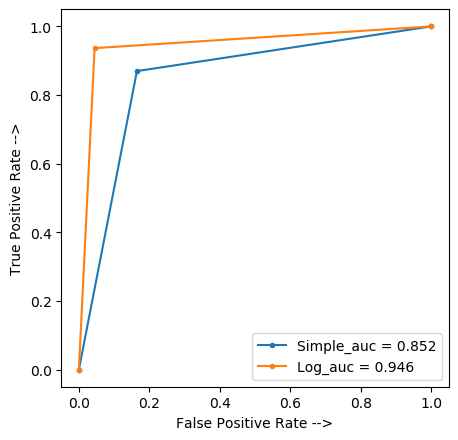

In [99]:
LOG_actual = list(train_q['target'])
LOG_pred = list(train_q['Log_likelihood_Sentiment'])

actual = list(train_q['target'])
pred = list(train_q['Sentiment'])


from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(actual, pred)
log_fpr, log_tpr, log_threshold = roc_curve(LOG_actual, LOG_pred)


simple_auc = auc(fpr, tpr)
log_auc = auc(log_fpr, log_tpr)

#svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
#auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
#plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.plot(fpr, tpr, marker='.', label='Simple_auc = %0.3f' % simple_auc)
plt.plot(log_fpr, log_tpr, marker='.', label='Log_auc = %0.3f' % log_auc)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()